In [1]:
import torch
import torch.nn as nn
from Datasets import Datasets
from VADE import VaDE
from VAE import VAE
import copy
import time
from sklearn.metrics import rand_score, adjusted_rand_score, adjusted_mutual_info_score, homogeneity_score, fowlkes_mallows_score
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
batch_size=800
DL_train, DL_test= Datasets.get_data('MNIST',batch_size)

In [3]:
vae = VAE().to(device)
vae.to(device)

VAE(
  (encoder): Encoder(
    (fc1): Linear(in_features=784, out_features=500, bias=True)
    (fc2): Linear(in_features=500, out_features=500, bias=True)
    (fc3): Linear(in_features=500, out_features=2000, bias=True)
    (fc_mean): Linear(in_features=2000, out_features=10, bias=True)
    (fc_log_var): Linear(in_features=2000, out_features=10, bias=True)
  )
  (decoder): Decoder(
    (fc1): Linear(in_features=10, out_features=2000, bias=True)
    (fc2): Linear(in_features=2000, out_features=500, bias=True)
    (fc3): Linear(in_features=500, out_features=500, bias=True)
    (fc4): Linear(in_features=500, out_features=784, bias=True)
  )
)

In [4]:
vae.train(DL_train, 100)

Epoch: 0, Loss=215.3612, LR=0.0020
Epoch: 1, Loss=187.9557, LR=0.0020
Epoch: 2, Loss=168.3326, LR=0.0020
Epoch: 3, Loss=153.5347, LR=0.0020
Epoch: 4, Loss=144.3916, LR=0.0020
Epoch: 5, Loss=139.5265, LR=0.0020
Epoch: 6, Loss=136.0449, LR=0.0020
Epoch: 7, Loss=132.1653, LR=0.0020
Epoch: 8, Loss=129.8531, LR=0.0020
Epoch: 9, Loss=127.3365, LR=0.0019
Epoch: 10, Loss=123.9825, LR=0.0019
Epoch: 11, Loss=121.2573, LR=0.0019
Epoch: 12, Loss=118.9355, LR=0.0019
Epoch: 13, Loss=116.9261, LR=0.0019
Epoch: 14, Loss=115.6455, LR=0.0019
Epoch: 15, Loss=114.2607, LR=0.0019
Epoch: 16, Loss=113.6212, LR=0.0019
Epoch: 17, Loss=112.5484, LR=0.0019
Epoch: 18, Loss=112.0092, LR=0.0019
Epoch: 19, Loss=111.5139, LR=0.0018
Epoch: 20, Loss=110.8161, LR=0.0018
Epoch: 21, Loss=110.3157, LR=0.0018
Epoch: 22, Loss=110.0238, LR=0.0018
Epoch: 23, Loss=109.4291, LR=0.0018
Epoch: 24, Loss=109.1273, LR=0.0018
Epoch: 25, Loss=108.7980, LR=0.0018
Epoch: 26, Loss=108.5650, LR=0.0018
Epoch: 27, Loss=108.1812, LR=0.0018
Ep

In [3]:
# torch.save(vae.encoder, f'vae_encoder{int(time.time())}.pth')
# torch.save(vae.decoder, f'vae_decoder{int(time.time())}.pth')
# torch.save(vae, f'vae{int(time.time())}.pth')


In [18]:
vade_encoder = copy.deepcopy(vae.encoder)
vade_decoder = copy.deepcopy(vae.decoder)
vade = VaDE(vade_encoder, vade_decoder)
vade.to(device)

VaDE(
  (encoder): Encoder(
    (fc1): Linear(in_features=784, out_features=500, bias=True)
    (fc2): Linear(in_features=500, out_features=500, bias=True)
    (fc3): Linear(in_features=500, out_features=2000, bias=True)
    (fc_mean): Linear(in_features=2000, out_features=10, bias=True)
    (fc_log_var): Linear(in_features=2000, out_features=10, bias=True)
  )
  (decoder): Decoder(
    (fc1): Linear(in_features=10, out_features=2000, bias=True)
    (fc2): Linear(in_features=2000, out_features=500, bias=True)
    (fc3): Linear(in_features=500, out_features=500, bias=True)
    (fc4): Linear(in_features=500, out_features=784, bias=True)
  )
)

In [19]:
vade.train(DL_train,100)

Epoch: 0, Loss=158.9777, LR=0.0020
Epoch: 1, Loss=100.9162, LR=0.0020
Epoch: 2, Loss=99.0427, LR=0.0020
Epoch: 3, Loss=98.3967, LR=0.0020
Epoch: 4, Loss=97.6988, LR=0.0020
Epoch: 5, Loss=97.5774, LR=0.0020
Epoch: 6, Loss=96.9342, LR=0.0020
Epoch: 7, Loss=96.5962, LR=0.0020
Epoch: 8, Loss=96.3548, LR=0.0020
Epoch: 9, Loss=96.1535, LR=0.0019
Epoch: 10, Loss=95.8661, LR=0.0019
Epoch: 11, Loss=95.6811, LR=0.0019
Epoch: 12, Loss=95.4653, LR=0.0019
Epoch: 13, Loss=95.4204, LR=0.0019
Epoch: 14, Loss=95.3510, LR=0.0019
Epoch: 15, Loss=95.0839, LR=0.0019
Epoch: 16, Loss=94.9205, LR=0.0019
Epoch: 17, Loss=94.8482, LR=0.0019
Epoch: 18, Loss=94.9257, LR=0.0019
Epoch: 19, Loss=94.5857, LR=0.0018
Epoch: 20, Loss=94.4045, LR=0.0018
Epoch: 21, Loss=94.3022, LR=0.0018
Epoch: 22, Loss=94.4109, LR=0.0018
Epoch: 23, Loss=94.1376, LR=0.0018
Epoch: 24, Loss=94.0774, LR=0.0018
Epoch: 25, Loss=94.0434, LR=0.0018
Epoch: 26, Loss=93.9630, LR=0.0018
Epoch: 27, Loss=93.7299, LR=0.0018
Epoch: 28, Loss=93.7002, LR=

In [4]:
# torch.save(vade, f'vade{int(time.time())}.pth')

In [5]:
def loader_to_tensor(data_loader):
    X, Y = [], []
    for x,y in data_loader:
        X.append(x)
        Y.append(y)
    X = torch.cat(X, 0).to(device)
    Y = torch.cat(Y, 0)
    return X, Y

x_test, y_test = loader_to_tensor(DL_test)
x_train, y_train = loader_to_tensor(DL_train)

# 1. Evaluate

In [6]:
y_test_hat = vade.predict(x_test)
#rand isn't scale to 0, adjusted is scaled so random is = 0, mi is mi
#higher is better
rand_score(y_test, y_test_hat), adjusted_rand_score(y_test, y_test_hat), adjusted_mutual_info_score(y_test, y_test_hat), homogeneity_score(y_test, y_test_hat), fowlkes_mallows_score(y_test, y_test_hat)

(0.9514068406840684,
 0.7407627484074616,
 0.7846422345270339,
 0.7759029277905148,
 0.7685243572596566)

# 2. Compare

In [15]:
# ch - higher is better, db - lower (0) is better
z_test_pred_vade = vade.encoder(x_test)[0].detach().cpu().numpy()
print('Latent space', calinski_harabasz_score(z_test_pred_vade, y_test_hat), davies_bouldin_score(z_test_pred_vade, y_test_hat))

Latent space 1025.1066972376764 1.8862477458041749


In [16]:
# ch - higher is better, db - lower (0) is better
z_test_pred_vae = vae.encoder(x_test)[0].detach().cpu().numpy()
print('Latent space', calinski_harabasz_score(z_test_pred_vae, y_test_hat), davies_bouldin_score(z_test_pred_vae, y_test_hat))

Latent space 570.867088241869 2.46329520043259


# 3. Visualize

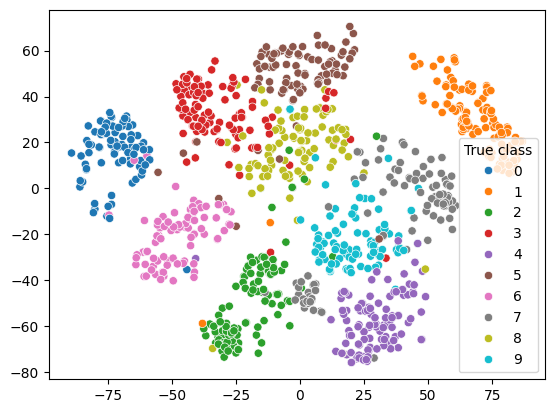

In [17]:
tsne = TSNE(n_components=2)
z_test_pred_tsne_vade = tsne.fit_transform(z_test_pred_vade) # test or train?
N=1000
sns.scatterplot(x=z_test_pred_tsne_vade[:N,0], y=z_test_pred_tsne_vade[:N,1], hue=y_test[:N], palette=sns.color_palette("tab10"))
plt.legend(title='True class')
plt.show()

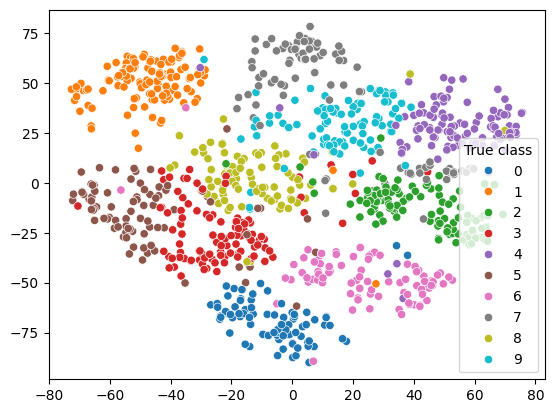

In [18]:
tsne = TSNE(n_components=2)
z_test_pred_tsne_vae = tsne.fit_transform(z_test_pred_vae) # test or train?
N=1000
sns.scatterplot(x=z_test_pred_tsne_vae[:N,0], y=z_test_pred_tsne_vae[:N,1], hue=y_test[:N], palette=sns.color_palette("tab10"))
plt.legend(title='True class')
plt.show()

# 4. Visualize generated

In [33]:
Z, y = vade.sample_clusters()
vade.cpu()
X_gen = vade.decoder(torch.Tensor(Z))
y_train_hat = vade.predict(x_train)
x_train = x_train.cpu()

In [34]:
data = []
for label in y:
    curr_vec = X_gen[label].cpu()
    in_cluster_data = x_train[y_train_hat==label]
    out_cluster_data = x_train[y_train_hat!=label]
    in_vec, in_closest_dist = None, None
    out_vec, out_closest_dist = None, None
    if len(in_cluster_data)>0:
        in_dist = torch.sqrt(torch.sum((in_cluster_data - curr_vec) ** 2, dim=1))
        in_closest_dist, in_closest_index = torch.min(in_dist), torch.argmin(in_dist)
        in_vec = in_cluster_data[in_closest_index]
    if len(out_cluster_data)>0:
        out_dist = torch.sqrt(torch.sum((out_cluster_data - curr_vec) ** 2, dim=1))
        out_closest_dist, out_closest_index = torch.min(out_dist), torch.argmin(out_dist)
        out_vec = out_cluster_data[out_closest_index]
    data.append([curr_vec, in_vec, in_closest_dist, out_vec, out_closest_dist, label])

<Figure size 640x480 with 0 Axes>

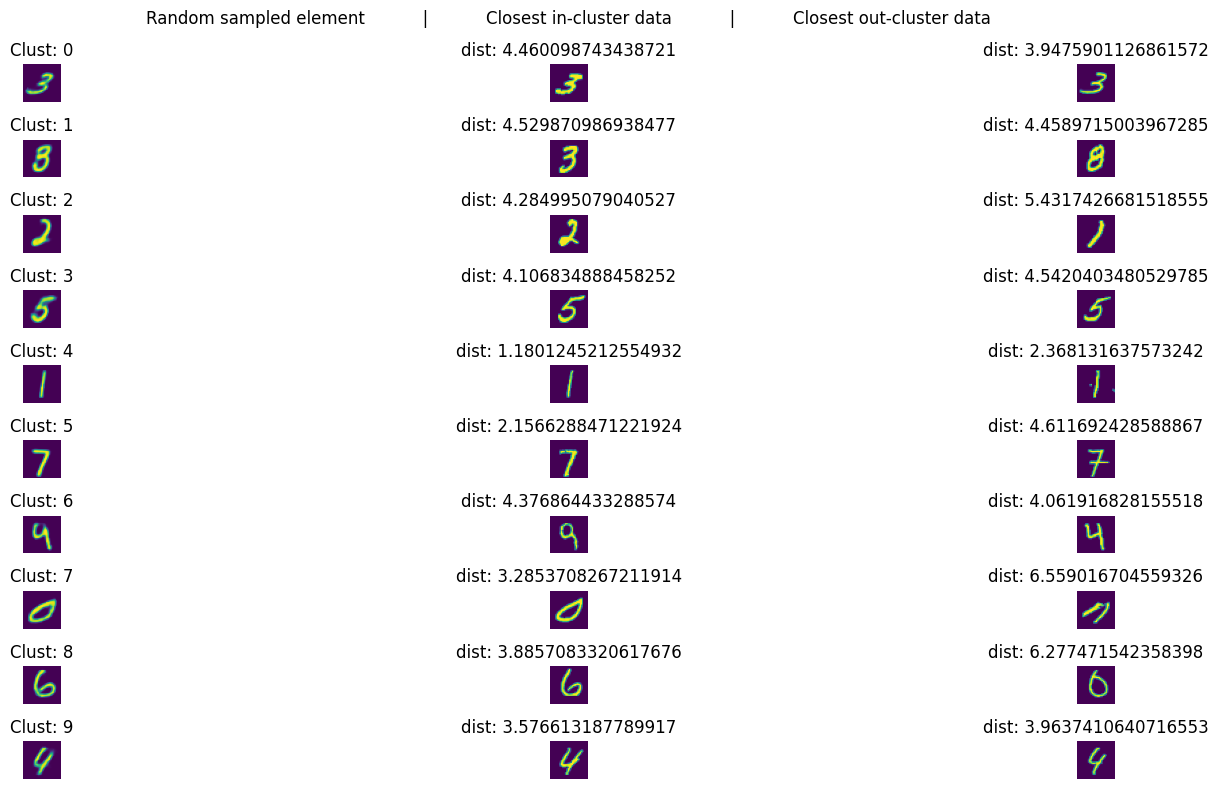

In [35]:
plt.figure()
fig, axes = plt.subplots(nrows=10, ncols=3, figsize=(20,8))
fig.suptitle("Random sampled element           |           Closest in-cluster data           |           Closest out-cluster data")
to_img = lambda img: torch.unflatten(img, 0, (28,28)).detach().numpy()
for list_elems, ax in zip(data, axes):
    titles = [f"Clust: {list_elems[-1]}", f"dist: {list_elems[2]}", f"dist: {list_elems[4]}"]
    for j, ind, title in zip([list_elems[0], list_elems[1], list_elems[3]], [0,1,2], titles):
        ax[ind].set_axis_off()
        if j is not None:
            ax[ind].imshow(to_img(j))
            ax[ind].set_title(title)
plt.tight_layout()
plt.show()